![airplane](images/cover_image.webp)

# Aviation Risk Evaluation

**Author:** Kelvin Kipkorir
***

# Overview
Our company has decided to diversify its business portfolio by entering the aviation industry. It aims to purchase and operate airplanes for both commercial and private enterprises. This analysis utilizes data from the National Transportation Safety Board (1962–2023), which includes aviation accident records, to identify the aircraft with the lowest risk. Additionally, the findings will be translated into actionable insights to assist the head of the new aviation division in making informed aircraft purchasing decisions.


# Business Problem

Our company is expanding into the aviation industry by purchasing and operating aircraft for both commercial and private enterprises. However, one of the key challenges is determining which aircraft models pose the least risk in terms of safety and operational efficiency.To address this, we will analyze aviation accident data to identify aircraft with the lowest risk. This analysis will focus on factors such as accident rates, causes, and operational conditions. By answering these questions, we aim to provide actionable insights that will help the head of the new aviation division make data-driven decisions on which aircraft to purchase, ensuring both safety and business sustainability.



#  Data Understanding and Exploration

The data used in this analysis is from the National Transportation Safety Board (NTSB) and was obtained from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses).  
The dataset includes aviation accident records from 1962 to 2023, providing insights into accident patterns, aircraft risks, and contributing factors.  

  
Each row in the dataset represents a recorded aviation accident or incident within:  
- The United States and its territories 
- International waters (if involving U.S. aircraft)  

The dataset contains **88,889 rows and 31 columns**, covering details such as:  
- **Aircraft Information** - Make, Model, Category, Number of Engines  
- **Accident Details** - Date, Location, Weather Conditions, Phase of Flight  
- **Consequences** - Injury Severity, Aircraft Damage  


Our company is expanding into the aviation industry by purchasing and operating aircraft for both commercial and private enterprises.  
One of the key challenges is determining which aircraft models pose the least risk in terms of safety and operational efficiency.  

To address this, we will analyze aviation accident data to:  
- Identify aircraft models with the lowest accident rates  
- Examine common causes of accidents for different aircraft types  
- Evaluate how factors like weather, flight phase, and manufacturer influence accidents  
- Provide actionable insights to guide decision-making on which aircraft to purchase  

This analysis will help the head of the new aviation division make data-driven choices.

The dataset includes categorical and numerical variables, which we will analyze to determine accident trends.  

Key variables include:  
- **`Make`** - (Categorical) Identifies the aircraft manufacturer.  
- **`Model`** - (Categorical) Specifies the aircraft type.  
- **`Broad.phase.of.flight`** - (Categorical) Indicates when the accident occurred (e.g., takeoff, landing).  
- **`Weather.Condition`** - (Categorical) Defines if the accident occurred under VMC (good weather) or IMC (bad weather).  
- **`Number.of.Engines`** - (Numerical) Indicates aircraft engine count.  
- **`Injury.Severity`** - (Categorical) Categorizes accidents based on fatal, serious, minor, or no injuries.  

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# look through our directory
!ls

AviationData.csv
README.md
USState_Codes.csv
dsc-phase1-project-template.ipynb
images


In [3]:
#Read the aviation_csv  
orig_aviation_df = pd.read_csv('AviationData.csv',encoding='latin-1',low_memory=False)
print(orig_aviation_df.shape)
orig_aviation_df.head()

(88889, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#inspecting columns to get more insight
orig_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
#looking at dataset's columns names
orig_aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

****
Before beginning the analysis, I reviewed the dataset to understand the meaning of each column. Some variables were straightforward, while others required further investigation. Here are key columns and their descriptions:

- **`Amateur.Built`** → Indicates whether the aircraft was homebuilt by an individual or manufactured by a certified company.
- **`FAR.Description`** → Specifies the Federal Aviation Regulations (FAR) under which the aircraft was operating (e.g., General Aviation, Air Taxi).
- **`Broad.phase.of.flight`** → Identifies the phase of flight during which an accident occurred (e.g., Takeoff, Landing, Cruise).
- **`Injury.Severity`** → Categorizes the severity of injuries in an accident (e.g., Fatal, Serious, Minor, None).

In [6]:
#looking at total null values per column
orig_aviation_df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i


### Exploration of Key Variables  

Before preparing the data, I first examined the value counts for key variables. This helped in:  

- Identifying which aircraft makes and models appear most frequently in accidents  
- Understanding the most common aircraft categories involved in incidents  
- Checking for potential inconsistencies that may need cleaning

In [7]:
#Looking through the values of makes to see which have the most common accidents
orig_aviation_df['Make'].value_counts()

Cessna            22227
Piper             12029
CESSNA             4922
Beech              4330
PIPER              2841
                  ...  
Grunska               1
Kashan Michael        1
Baggarley             1
Iv Inc.               1
Bill Parson           1
Name: Make, Length: 8237, dtype: int64

In [8]:
# models to see which have the most accidents
orig_aviation_df['Model'].value_counts()

152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
Pit Bull JD-3       1
TERRA II            1
H-19/S55            1
G103C               1
SC II               1
Name: Model, Length: 12318, dtype: int64

In [9]:
#aircraft category
orig_aviation_df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [10]:
#Injury.Severity
orig_aviation_df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(135)        1
Fatal(56)         1
Fatal(256)        1
Fatal(121)        1
Fatal(47)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [11]:
#purpose of the flight
orig_aviation_df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [12]:
#exploring the Report.Status
orig_aviation_df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                            61754
Foreign                                                                                                                                                                                                                                    1999
<br /><br />                                                                                                                                                                                                                                167
Factual                                                                                                                                                                                                                                     145
The pilot's failure to maintain directio

In [13]:
orig_aviation_df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [14]:
orig_aviation_df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

# Data Preparation  and Cleaning

Before analysis, the dataset was cleaned for relevance. This involved:  

###  Dropping Unnecessary Columns  
The dataset originally contained 31 columns, many of which were not relevant to the analysis. The following columns were dropped:  

- **Location Data:** `Longitude`, `Latitude` (Countries and location variables are sufficient)  
- **High Missing Values:** `Schedule`, `Air.carrier`, `FAR.Description` (Too much missing data)  
- **Airport Information:** `Airport.Code`, `Airport.Name` (Not relevant to safety analysis)  
- **Injury Details:** `Total.Minor.Injuries`, `Total.Serious.Injuries`, `Total.Fatal.Injuries`, `Total.Uninjured` (Injury severity alone is enough)  
- **Identifiers & Metadata:** `Accident.Number`, `Investigation.Type`, `Event.ID`, `Registration.Number`, `Report.Status`, `Publication.Date` (Only for record-keeping)  

###  Handling Missing Values  
- Key Variables with Missing Data:  
  - `Aircraft.Category` and `Broad.phase.of.flight` had missing values but were important to the analysis, so missing values were filled.  
  - For all other columns, rows with missing values were removed.  

###   Filtering and Transforming Data  
- Only non-homebuilt aircraft (`Amateur.Built = "No"`) were included, since our focus is on commercial and certified aircraft.  
- The `Event.Date` column was converted to datetime format to enable time-based analysis.  

###  Cleaning Categorical Variables  
- The `Make` column contained inconsistencies and duplicate manufacturer names (e.g., "Boeing Inc." vs. "Boeing"). These were standardized for consistency.  
- Text-based columns were stripped of extra spaces and converted to lowercase to ensure uniform formatting.  



In [15]:
#Cleaning the columns we will not use 
columns_to_drop = ['Longitude','Latitude','Airport.Name','Airport.Code','Total.Minor.Injuries','Total.Serious.Injuries',
                   'Total.Fatal.Injuries','Total.Uninjured','Schedule','Accident.Number','Investigation.Type','Event.Id' ,
                   'Registration.Number','Publication.Date','Air.carrier','FAR.Description','Report.Status']
mod_aviation_df = orig_aviation_df.drop(columns_to_drop,axis=1) 

In [16]:
mod_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             88889 non-null  object 
 1   Location               88837 non-null  object 
 2   Country                88663 non-null  object 
 3   Injury.Severity        87889 non-null  object 
 4   Aircraft.damage        85695 non-null  object 
 5   Aircraft.Category      32287 non-null  object 
 6   Make                   88826 non-null  object 
 7   Model                  88797 non-null  object 
 8   Amateur.Built          88787 non-null  object 
 9   Number.of.Engines      82805 non-null  float64
 10  Engine.Type            81812 non-null  object 
 11  Purpose.of.flight      82697 non-null  object 
 12  Weather.Condition      84397 non-null  object 
 13  Broad.phase.of.flight  61724 non-null  object 
dtypes: float64(1), object(13)
memory usage: 9.5+ MB


In [17]:
#Remove white spaces and lowers the case for all string columns
string_cols = mod_aviation_df.select_dtypes(include=["object"]).columns
mod_aviation_df[string_cols] = mod_aviation_df[string_cols].apply(lambda x: x.str.strip().str.lower())
mod_aviation_df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"moose creek, id",united states,fatal(2),destroyed,NaN,stinson,108-3,no,1.0,reciprocating,personal,unk,cruise
1,1962-07-19,"bridgeport, ca",united states,fatal(4),destroyed,NaN,piper,pa24-180,no,1.0,reciprocating,personal,unk,unknown
2,1974-08-30,"saltville, va",united states,fatal(3),destroyed,NaN,cessna,172m,no,1.0,reciprocating,personal,imc,cruise
3,1977-06-19,"eureka, ca",united states,fatal(2),destroyed,NaN,rockwell,112,no,1.0,reciprocating,personal,imc,cruise
4,1979-08-02,"canton, oh",united states,fatal(1),destroyed,NaN,cessna,501,no,NaN,NaN,personal,vmc,approach


In [18]:
#Replacing Null values in the Aircraft.Category And Broad.phase.of.flight
mod_aviation_df['Aircraft.Category'].fillna("Unknown", inplace=True)
mod_aviation_df['Broad.phase.of.flight'].fillna('Uknown',inplace=True)
mod_aviation_df.isna().sum()

Event.Date                  0
Location                   52
Country                   226
Injury.Severity          1000
Aircraft.damage          3194
Aircraft.Category           0
Make                       63
Model                      92
Amateur.Built             102
Number.of.Engines        6084
Engine.Type              7077
Purpose.of.flight        6192
Weather.Condition        4492
Broad.phase.of.flight       0
dtype: int64

In [19]:

#Remove the missing values in the Engine type,Number of Engines
mod_aviation_df.dropna(subset=["Engine.Type","Number.of.Engines",'Purpose.of.flight'],inplace=True)
mod_aviation_df.isna().sum()

Event.Date                  0
Location                   18
Country                   216
Injury.Severity            18
Aircraft.damage          1194
Aircraft.Category           0
Make                       11
Model                      26
Amateur.Built              16
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Weather.Condition         305
Broad.phase.of.flight       0
dtype: int64

In [20]:
#Remove the missing values in Country,Weather.Condition,Make,Model,Amateur.Built,Injury.Severity,Location
mod_aviation_df.dropna(subset=["Country","Weather.Condition",'Make','Model','Amateur.Built','Injury.Severity','Location'],inplace=True)
mod_aviation_df.isna().sum()

Event.Date                  0
Location                    0
Country                     0
Injury.Severity             0
Aircraft.damage          1164
Aircraft.Category           0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Weather.Condition           0
Broad.phase.of.flight       0
dtype: int64

In [21]:
#use the mode to replace Aircraft.damage category
mod_aviation_df['Aircraft.damage'].fillna(mod_aviation_df['Aircraft.damage'].mode()[0], inplace=True)
print(mod_aviation_df.shape)
mod_aviation_df.isna().sum()

(76512, 14)


Event.Date               0
Location                 0
Country                  0
Injury.Severity          0
Aircraft.damage          0
Aircraft.Category        0
Make                     0
Model                    0
Amateur.Built            0
Number.of.Engines        0
Engine.Type              0
Purpose.of.flight        0
Weather.Condition        0
Broad.phase.of.flight    0
dtype: int64

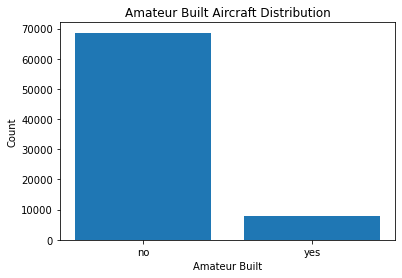

In [22]:
#Let visualize the armature built 
amature_dist = mod_aviation_df['Amateur.Built'].value_counts()
x = list(amature_dist.index[:2])
y = list(amature_dist.values[:2])

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x=x,height=y)
ax.set_title('Amateur Built Aircraft Distribution')
ax.set_xlabel('Amateur Built')
ax.set_ylabel('Count')
plt.show();


### Filtering Out Homebuilt Aircraft  
Since our company wants to purchase and operate aircraft for commercial and private enterprises, we need to focus on aircraft made by certified manufacturers.
To align with our business goals, we **only include aircraft where `Amateur.Built = "No"`** in our analysis.

In [23]:
mod_aviation_df = mod_aviation_df[mod_aviation_df['Amateur.Built']=='no']
mod_aviation_df.shape

(68622, 14)

In [24]:
# Count total duplicate rows
duplicate_count = mod_aviation_df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

#remove the duplicate rows
mod_aviation_df = mod_aviation_df.drop_duplicates()
mod_aviation_df.info()

Total duplicate rows: 29
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68593 entries, 0 to 88767
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             68593 non-null  object 
 1   Location               68593 non-null  object 
 2   Country                68593 non-null  object 
 3   Injury.Severity        68593 non-null  object 
 4   Aircraft.damage        68593 non-null  object 
 5   Aircraft.Category      68593 non-null  object 
 6   Make                   68593 non-null  object 
 7   Model                  68593 non-null  object 
 8   Amateur.Built          68593 non-null  object 
 9   Number.of.Engines      68593 non-null  float64
 10  Engine.Type            68593 non-null  object 
 11  Purpose.of.flight      68593 non-null  object 
 12  Weather.Condition      68593 non-null  object 
 13  Broad.phase.of.flight  68593 non-null  object 
dtypes: float64(1), object(13)
mem

### Cleaning the `Make` Column  

The `Make` column contained inconsistencies due to variations in manufacturer names.There were different ways of writing the same manufacturer (e.g., "Cessna Aircraft Co." vs. "Cessna")  

To address this, I created a **dictionary to map and replace repeated values**. This dictionary mapped manufacturer names by merging variations into a single format (e.g., "boeing aircraft co." - "boeing"). 

In [25]:
pd.set_option("display.max_rows", None) #to see the whole range of values

# Show all aircraft makes with their counts
print(mod_aviation_df["Make"].value_counts().head(70))

cessna                            24985
piper                             13770
beech                              4800
bell                               2120
mooney                             1251
grumman                            1128
boeing                             1044
bellanca                           1013
robinson                            902
hughes                              844
air tractor                         631
aeronca                             607
maule                               557
champion                            495
schweizer                           481
stinson                             425
luscombe                            398
aero commander                      383
taylorcraft                         373
mcdonnell douglas                   360
north american                      356
hiller                              336
rockwell                            331
de havilland                        330
aerospatiale                        313


Looking at the data above there are many repeated values 

In [26]:
#A dictionary holding repated values and their replacements
replacement_dict = {
    "zlin aviation": "zlin",
    "zlin aviation inc": "zlin",
    "cessna aircraft company": "cessna",
    "cessna aircraft co": "cessna",
    "cessna co": "cessna",
    "piper aircraft": "piper",
    "piper aircraft inc": "piper",
    "beechcraft corp": "beechcraft",
    "beech aircraft": "beechcraft",
    "beech aircraft corp": "beechcraft",
    "beechcraft aviation": "beechcraft",
    "bombardier inc": "bombardier",
    "bombardier aerospace": "bombardier",
    "boeing aircraft company": "boeing",
    "boeing co": "boeing",
    "boeing commercial airplanes": "boeing",
    "airbus industrie": "airbus",
    "airbus sas": "airbus",
    "airbus helicopters": "airbus",
    "hawker beechcraft": "hawker",
    "hawker aircraft": "hawker",
    "hawker siddeley": "hawker",
    "mooney aircraft": "mooney",
    "mooney international": "mooney",
    "gulfstream aerospace": "gulfstream",
    "gulfstream aerospace corp": "gulfstream",
    "embraer aircraft": "embraer",
    "embraer s.a.": "embraer",
    "sikorsky aircraft": "sikorsky",
    "sikorsky helicopters": "sikorsky",
    "cirrus aircraft": "cirrus",
    "cirrus design corp": "cirrus",
    "diamond aircraft": "diamond",
    "diamond aircraft industries": "diamond"
}

In [27]:
#mapping to replace repeated values using the dictionary
mod_aviation_df["Make"] = mod_aviation_df["Make"].replace(replacement_dict)
print(mod_aviation_df["Make"].value_counts().head(70))

cessna                            25008
piper                             13786
beech                              4800
bell                               2120
mooney                             1252
grumman                            1128
boeing                             1044
bellanca                           1013
robinson                            902
hughes                              844
air tractor                         631
aeronca                             607
maule                               557
champion                            495
schweizer                           481
stinson                             425
luscombe                            398
aero commander                      383
taylorcraft                         373
mcdonnell douglas                   360
north american                      356
hiller                              336
rockwell                            331
de havilland                        330
aerospatiale                        313


### Converting `Event.Date` to Datetime and Filtering Recent Data  

To analyze recent trends, the `Event.Date` column was converted to datetime format. This allows for proper date-based operations.  

Since older data may not reflect current aviation standards and technologies, we filtered the dataset to include only accidents from the year 2000 onward.  


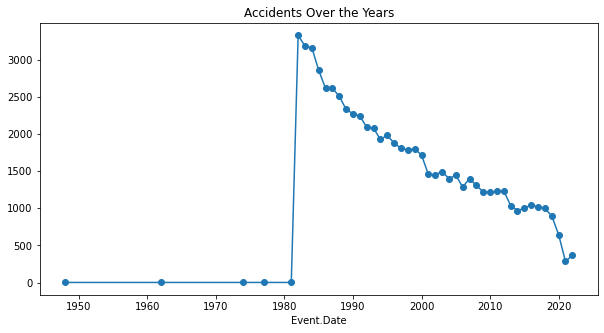

In [28]:
pd.reset_option("display.max_rows")#resetting the output such that i cannot see alot of values

#first convert Event.Date to date time
mod_aviation_df['Event.Date'] = pd.to_datetime(mod_aviation_df['Event.Date']) 
yearly_accidents = mod_aviation_df.groupby(mod_aviation_df['Event.Date'].dt.year).size()

# visualize accident trends over time
yearly_accidents.plot(kind='line', figsize=(10,5), marker='o', title='Accidents Over the Years');

#filter as from 2000
mod_aviation_df = mod_aviation_df[mod_aviation_df['Event.Date'].dt.year >= 2000]

# Data Analysis, Visualization and Evaluation  

This section explores aviation accident trends using visualizations. The goal is to identify patterns that can help in evaluating aircraft risk and guiding purchasing decisions.  

### Trends in Aviation Accidents Over Time 
Understanding how accident rates have changed over the years provides insight into whether aviation safety has improved or declined.  

- **Line graph:** Accidents per year from 2000 onward  

### Manufacturers and Accident Patterns
Examining accident counts by manufacturer helps identify which aircraft brands are most frequently involved in incidents.  

- **Bar chart:** Manufacturers with the most accidents  
- **Stacked bar chart:** Accident severity by manufacturer  
- **Line graph:** Trends in accidents over time for popular manufacturers  

### Aircraft Models and Accident Rates  
Some aircraft models may be more prone to accidents than others. Grouping data by decades helps identify which models have consistently high accident rates.  

- **Stacked bar chart:** Accidents by aircraft model across decades  

### Accident Trends by Aircraft Category 
Different aircraft types (e.g., commercial, private, cargo) may have varying safety records.  

- **Bar chart:** Accidents by aircraft category  

### Purpose of Flight and Accident Frequency 
The type of flight operation (e.g., personal, instructional, corporate) may influence accident risk.  

- **Bar chart:** Accidents by purpose of flight  

### Phase of Flight and Accident Risk  
Accidents can occur at any stage of a flight, but certain phases (e.g., takeoff, landing) may be more accident-prone.  

- **Line graph:** Accidents by phase of flight over time  
- **Heatmap:** Accidents by phase of flight and year  

### Impact of Weather on Accidents 
Weather conditions play a major role in aviation safety. Analyzing accidents under different weather conditions helps assess the risks posed by poor visibility and storms.  

- **Line graph:** Accidents by weather condition over time  
- **Heatmap:** Accidents by weather condition and year  

In [29]:
mod_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26111 entries, 47675 to 88767
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Date             26111 non-null  datetime64[ns]
 1   Location               26111 non-null  object        
 2   Country                26111 non-null  object        
 3   Injury.Severity        26111 non-null  object        
 4   Aircraft.damage        26111 non-null  object        
 5   Aircraft.Category      26111 non-null  object        
 6   Make                   26111 non-null  object        
 7   Model                  26111 non-null  object        
 8   Amateur.Built          26111 non-null  object        
 9   Number.of.Engines      26111 non-null  float64       
 10  Engine.Type            26111 non-null  object        
 11  Purpose.of.flight      26111 non-null  object        
 12  Weather.Condition      26111 non-null  object        
 1

## 1. Has aviation safety improved over the years, and what does this mean for our investment in aviation?  

Understanding accident trends over time helps assess whether the aviation industry has become safer and how that impacts investment decisions.

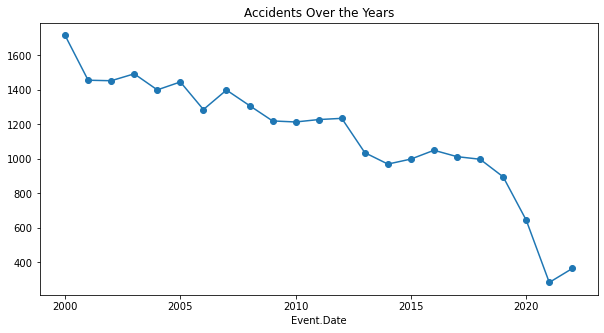

In [30]:
 
yearly_accidents = mod_aviation_df.groupby(mod_aviation_df['Event.Date'].dt.year).size()

# visualize accident trends over time
yearly_accidents.plot(kind='line', figsize=(10,5), marker='o', title='Accidents Over the Years');


### Answer:  
The graph shows a declining trend in aviation accidents from 2000 onward. This suggests that safety measures, technological advancements, and stricter regulations have contributed to fewer incidents.  

For our business, this is a positive indicator—investing in aircraft today comes with lower operational risks compared to past decades. With continued improvements in safety protocols and aircraft technology, the aviation industry is becoming an attractive sector for investment.

## 2. Which aircraft manufacturers have the highest number of accidents, and what does this mean for our purchasing decisions? 
Analyzing accident counts by manufacturer helps identify whether certain brands have a higher risk profile. This can guide our decision on which aircraft to consider or avoid.

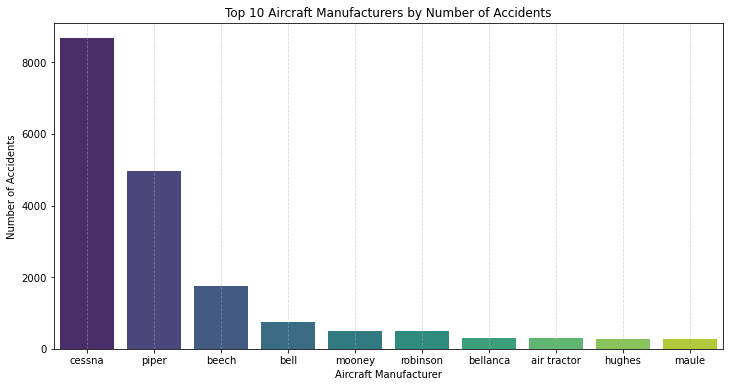

In [31]:

plt.figure(figsize=(12, 6))

#count accidents by aircraft manufacturer- just top 10
make_counts = mod_aviation_df["Make"].value_counts().head(10)  

#bar chart
sns.barplot(x=make_counts.index, y=make_counts.values, palette="viridis")
plt.xlabel('Aircraft Manufacturer')
plt.ylabel("Number of Accidents")
plt.title("Top 10 Aircraft Manufacturers by Number of Accidents")
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


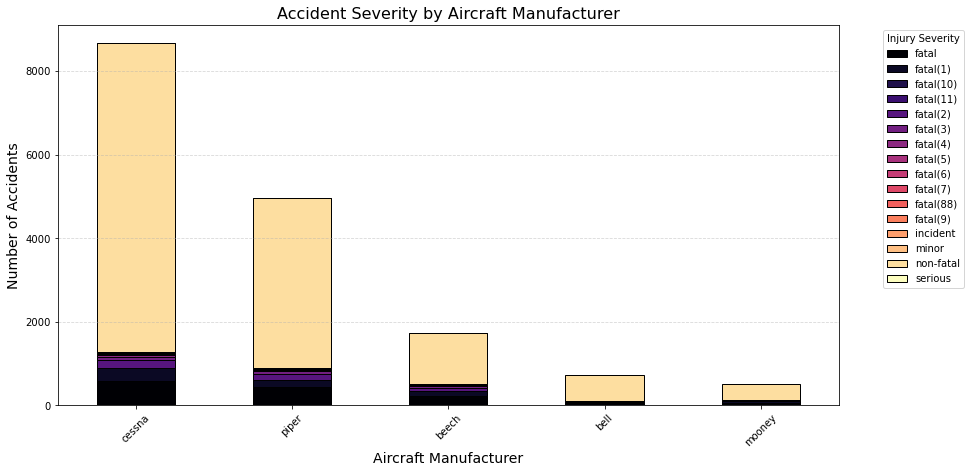

In [32]:
plt.figure(figsize=(14, 7))

#grouping by make and severity
make_severity = mod_aviation_df.groupby(["Make", "Injury.Severity"]).size().unstack()
make_severity = make_severity.loc[make_severity.sum(axis=1).nlargest(5).index]

#bar chart
make_severity.plot(kind="bar",stacked=True,  colormap="magma", edgecolor="black",ax=plt.gca())
plt.xlabel("Aircraft Manufacturer", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Accident Severity by Aircraft Manufacturer", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Injury Severity", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show();


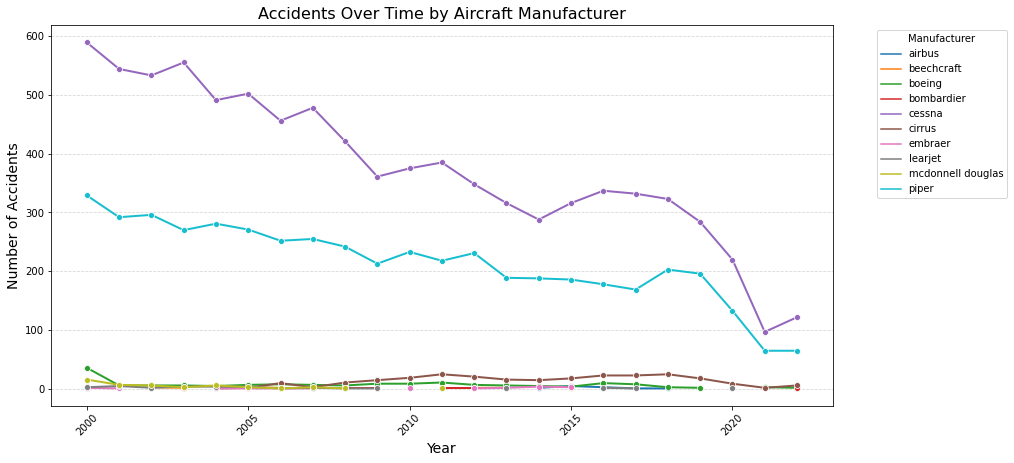

In [33]:
plt.figure(figsize=(14, 7))

#the market leaders of airplane manufacturing
selected_makes = ["boeing", "airbus", "cessna", "piper", "beechcraft", 
                  "embraer", "bombardier", "mcdonnell douglas", "cirrus", "learjet"]

#filter out your aata based on market leaders
filtered_makes = mod_aviation_df[mod_aviation_df["Make"].isin(selected_makes)].copy()

filtered_makes["Year"] = filtered_makes["Event.Date"].dt.year

#gouping based on year and make
make_trends = filtered_makes.groupby(["Year", "Make"]).size().unstack()

#line graph
sns.lineplot(data=make_trends, marker="o", linewidth=2, dashes=False, palette="tab10")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Accidents Over Time by Aircraft Manufacturer", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

### Answer:  

 **Accident Counts by Manufacturer**  
The stacked bar chart reveals that Cessna, Piper, and Beechcraft have the highest number of accidents.  
However, these manufacturers are dominant in general aviation, meaning they simply have more aircraft in operation.  

 **Accident Severity**  
While Cessna has the most total accidents, its accidents are not disproportionately severe compared to others. This suggests that while Cessna aircraft are frequently used, they may not be inherently unsafe.  

**Accidents Over Time**  
The line graph shows that Cessna has consistently had more accidents than other manufacturers, followed by Airbus.  
All other manufacturers have overlapping accident trends, indicating relatively similar safety records.  

### **Key Takeaways for Our Business:**  
- **High accident numbers do not necessarily mean high risk.** Cessna leads in accidents because of its high production volume in general aviation.  
- **For commercial aircraft, Airbus and Boeing dominate, but their accident trends are stable.**  

## 3. Which aircraft models have historically had the most and least accidents, and how does this influence our investment  decisions?

In [34]:
#visualize the top ten models with accidents over time

#create new column decade
mod_aviation_df['Decade'] = (mod_aviation_df['Event.Date'].dt.year//10)*10

model_accidents_by_decade = mod_aviation_df.groupby(['Decade','Model']).size().reset_index(name='Accident_counts')
#Subdivide into groups of decades 
top_10_models_by_decade = model_accidents_by_decade.groupby(['Decade']).apply(lambda x: x.nlargest(10,'Accident_counts')).reset_index(drop=True)

<Figure size 1296x576 with 0 Axes>

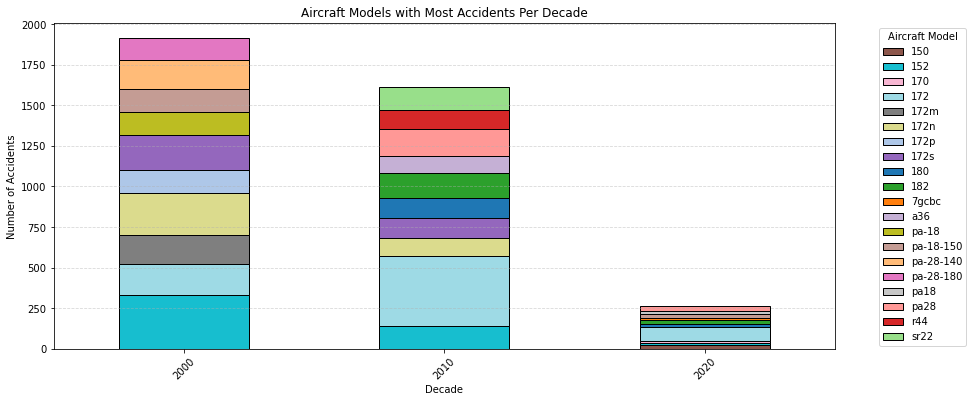

In [35]:
import random

plt.figure(figsize=(18, 8))

#Pivot for stacked bar chart
pivot_data = top_10_models_by_decade.pivot(index="Decade", columns="Model", values="Accident_counts").fillna(0)

#Defining a color palette
num_models = len(pivot_data.columns)  # Get the number of models
color_palette = list(sns.color_palette("tab20", num_models))
random.shuffle(color_palette) 

#Plot 
ax = pivot_data.plot(
    kind="bar", 
    stacked=True, 
    figsize=(14, 6), 
    color=color_palette,  
    edgecolor="black" 
)
plt.xlabel("Decade")
plt.ylabel("Number of Accidents")
plt.title("Aircraft Models with Most Accidents Per Decade")
plt.xticks(rotation=45)
plt.legend(title="Aircraft Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5) 

plt.show();

In [36]:
#bottom 10 models by accident count per decade
bottom_10_models_by_decade = (
    mod_aviation_df.groupby(["Decade", "Model"])
    .size()
    .reset_index(name="Accident_counts")  
)


bottom_10_models_by_decade = bottom_10_models_by_decade.groupby("Decade").apply(lambda x: x.nsmallest(10, "Accident_counts")).reset_index(drop=True)

#Pivot the data for stacked bar chart
pivot_data_bottom = bottom_10_models_by_decade.pivot(index="Decade", columns="Model", values="Accident_counts").fillna(0)

#palette
num_models_bottom = len(pivot_data_bottom.columns)
color_palette_bottom = sns.color_palette("tab20c", num_models_bottom)  
random.shuffle(color_palette_bottom)

<Figure size 1296x576 with 0 Axes>

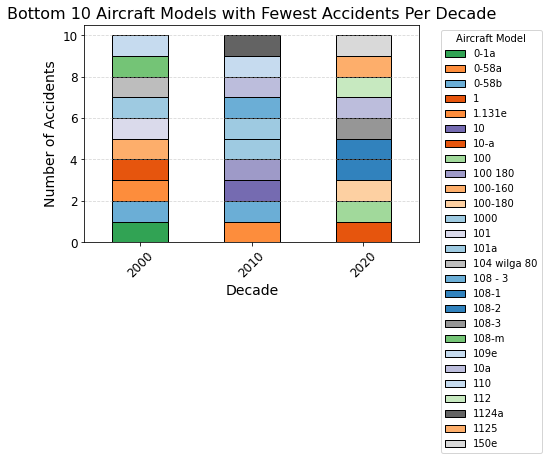

In [37]:
plt.figure(figsize=(18, 8))

#plot
ax = pivot_data_bottom.plot(
    kind="bar",
    stacked=True,  
    color=color_palette_bottom,  
    edgecolor="black"  
)

plt.xlabel("Decade", fontsize=14)  
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Bottom 10 Aircraft Models with Fewest Accidents Per Decade", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Aircraft Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show();

### **Answer:**  
The first visualization shows the top 10 aircraft models with the most accidents per decade, while the second highlights models with the fewest recorded accidents. Notably, models such as the Cessna 150, 172, and Piper PA-28 series have experienced higher accident counts, possibly due to their widespread use in flight training and general aviation. On the other hand, models in the bottom 10 have consistently maintained a low accident record.

For investment or operational decisions, high-accident models may indicate higher operational risks, maintenance costs, and insurance premiums, while low-accident models suggest better safety records and reliability. However, the popularity of an aircraft can also contribute to its accident frequency, meaning that higher accident numbers do not always equate to a lack of safety but rather a larger fleet size.

## 4. What are the accident trends across different aircraft categories, and which category poses the highest operational risk?

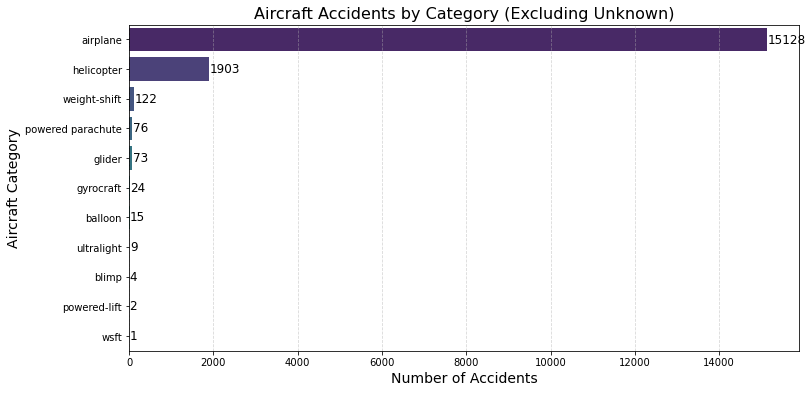

In [38]:
#filter_out uknown categories
filtered_df = mod_aviation_df[mod_aviation_df["Aircraft.Category"].str.lower() != "unknown"]

#counts of each category
category_counts = filtered_df["Aircraft.Category"].value_counts()

#Plot horizontal barchat
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")

for index, value in enumerate(category_counts.values):
    plt.text(value + 10, index, str(value), fontsize=12, verticalalignment='center')
plt.xlabel("Number of Accidents", fontsize=14)
plt.ylabel("Aircraft Category", fontsize=14)
plt.title("Aircraft Accidents by Category (Excluding Unknown)", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

### Answer: 
The bar chart visualizes aircraft accidents by category, excluding unknown classifications. Airplanes account for the vast majority of accidents 15,128, followed by helicopters 1,903. Other categories such as weight-shift, powered parachutes, and gliders have significantly fewer recorded accidents.

This trend suggests that airplanes and helicopters require more stringent safety measures, operational protocols, and risk mitigation strategies due to their higher accident rates. However, these numbers may also be influenced by fleet size and frequency of use, meaning higher accident counts don’t necessarily indicate lower safety standards.

## 5. Which flight categories are most prone to accidents, and how does this impact our investment strategy?

Understanding accident distribution across flight categories helps identify high-risk areas in aviation and informs investment decisions.

In [39]:
mod_aviation_df['Purpose.of.flight'].value_counts()

personal                     16115
instructional                 4231
aerial application            1549
business                       871
positioning                    784
other work use                 494
aerial observation             328
unknown                        326
public aircraft                220
flight test                    208
executive/corporate            153
ferry                          152
skydiving                      133
external load                   97
banner tow                      94
public aircraft - federal       87
public aircraft - local         70
public aircraft - state         62
air race show                   38
glider tow                      35
air race/show                   29
firefighting                    23
air drop                         8
pubs                             2
asho                             1
publ                             1
Name: Purpose.of.flight, dtype: int64

### Flight Category
To better analyze aircraft accidents by flight purpose,I simplified the classifiction by creating new categories

In [40]:

flight_category_map = {
    "personal": "General Aviation",
    "business": "General Aviation",
    "executive/corporate": "General Aviation",
    "instructional": "Training",
    "positioning": "Commercial",
    "ferry": "Commercial",
    "skydiving": "Commercial",
    "banner tow": "Commercial",
    "glider tow": "Commercial",
    "aerial application": "Aerial Work",
    "aerial observation": "Aerial Work",
    "external load": "Aerial Work",
    "firefighting": "Aerial Work",
    "air drop": "Aerial Work",
    "public aircraft": "Government",
    "public aircraft - federal": "Government",
    "public aircraft - local": "Government",
    "public aircraft - state": "Government",
    "air race show": "Airshow/Racing",
    "air race/show": "Airshow/Racing",
    "flight test": "Testing/Experimental",
    "other work use": "Other Aerial Work",
    "unknown": None,  
    "pubs": None,  
    "publ": None,
    "asho": None
}


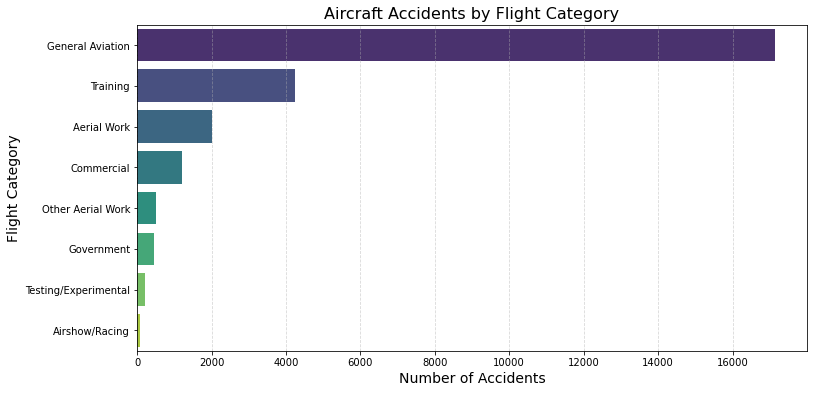

In [53]:
#A new column to simplify our flight purpose category
mod_aviation_df.loc[:, "Flight.Category"] = mod_aviation_df["Purpose.of.flight"].str.lower().map(flight_category_map)


#Drop any rows with null values after mapping
mod_aviation_df = mod_aviation_df.dropna(subset=["Flight.Category"])

plt.figure(figsize=(12, 6))


category_counts = mod_aviation_df["Flight.Category"].value_counts()


sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.xlabel("Number of Accidents", fontsize=14)
plt.ylabel("Flight Category", fontsize=14)
plt.title("Aircraft Accidents by Flight Category", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show();

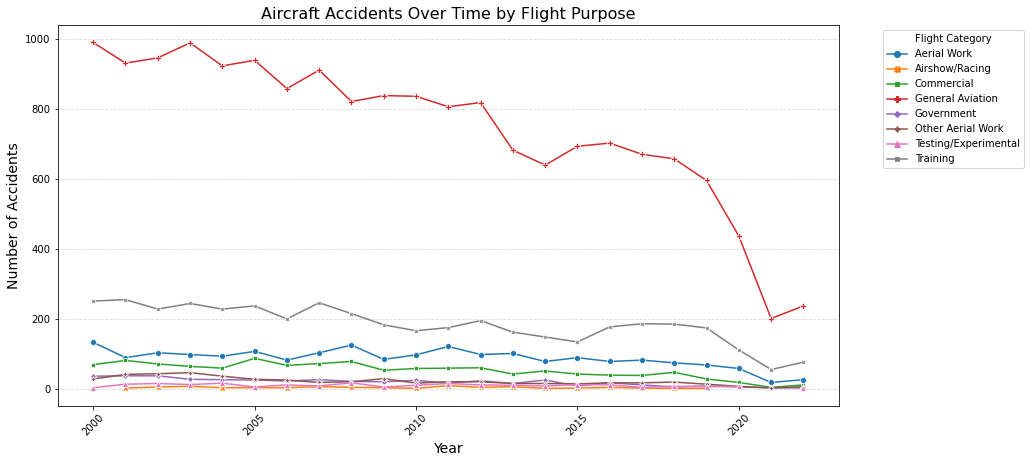

In [42]:

mod_aviation_df["Year"] = mod_aviation_df["Event.Date"].dt.year

mod_aviation_df = mod_aviation_df.dropna(subset=["Year"])

#gouping by year and catgory of flight
trend_data = mod_aviation_df.groupby(["Year", "Flight.Category"]).size().unstack()

#plot line graph
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_data, markers=True, dashes=False, palette="tab10")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Aircraft Accidents Over Time by Flight Purpose", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Flight Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

#### Answer: 
From the Aircraft Accidents by Flight Category bar chart, General Aviation accounts for the highest number of accidents, followed by Training and Aerial Work. This suggests that private and small-scale flights are the most vulnerable to accidents.

The Aircraft Accidents Over Time by Flight Purpose line graph highlights that while General Aviation accidents have declined significantly after 2015, they still dominate in total numbers. Training-related accidents remain steady, indicating a consistent risk in pilot training operations.

**Commercial vs. Private Investment:** Since commercial aviation has fewer accidents than General Aviation, our company may prioritize investing in commercial aircraft for lower risk and higher safety compliance.  

## 6. Which Phases of Flight Pose the Highest Risk?  

In [43]:
filtered_df['Broad.phase.of.flight'].value_counts()

Uknown         14468
landing         1304
takeoff          489
cruise           266
maneuvering      258
approach         235
go-around         88
taxi              87
descent           68
climb             43
standing          41
unknown            6
other              4
Name: Broad.phase.of.flight, dtype: int64

In [44]:

mod_aviation_df["Broad.phase.of.flight"] = mod_aviation_df["Broad.phase.of.flight"].str.lower()

filtered_df = mod_aviation_df[~mod_aviation_df["Broad.phase.of.flight"].isin(["unknown", ""])].copy()

#Count accidents per phase
phase_counts = filtered_df["Broad.phase.of.flight"].value_counts()

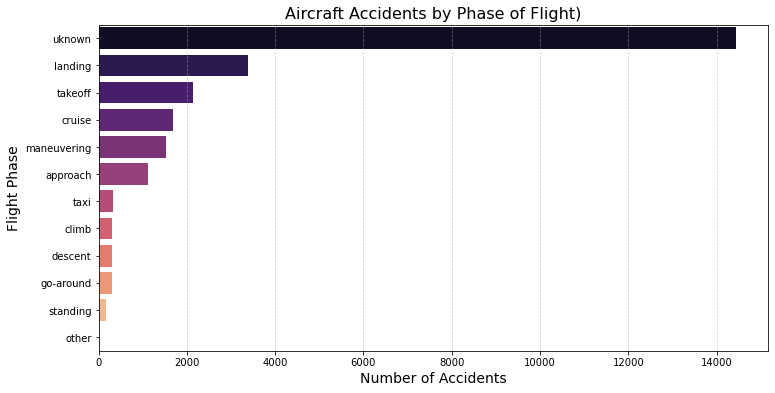

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=phase_counts.values, y=list(phase_counts.index), palette="magma")
plt.xlabel("Number of Accidents", fontsize=14)
plt.ylabel("Flight Phase", fontsize=14)
plt.title("Aircraft Accidents by Phase of Flight)", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


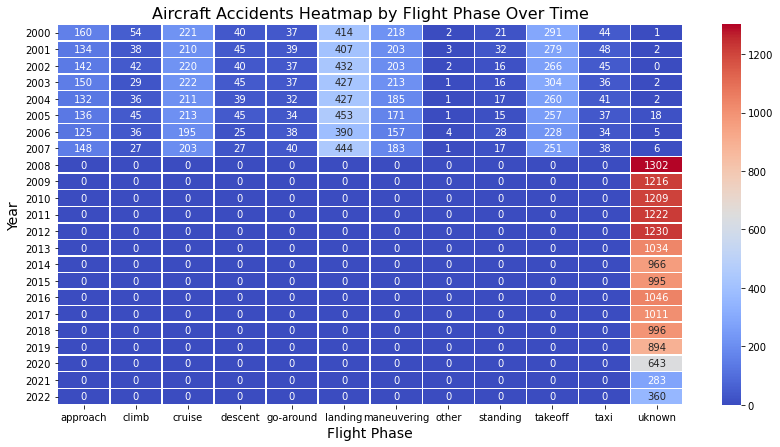

In [46]:
plt.figure(figsize=(14, 7))

#get year
filtered_df["Year"] = filtered_df["Event.Date"].dt.year

# # Group by year and flight phase, count occurrences
heatmap_data = filtered_df.groupby(["Year", "Broad.phase.of.flight"]).size().unstack(fill_value=0)

#heatmap
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt="d")
plt.xlabel("Flight Phase", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.title("Aircraft Accidents Heatmap by Flight Phase Over Time", fontsize=16)

plt.show();

### Answer:  
The bar chart shows that landing and takeoff phases account for the highest number of accidents, aside from an "unknown" category. These phases are the most critical in aviation, as they involve complex maneuvers, high pilot workload, and potential external risk factors like weather conditions and runway obstacles.

This means that our company should:
- **Focusing on rigorous pilot training** for takeoff and landing procedures to reduce human error.  
- **Investing in aircraft with strong reliability records** during these phases to minimize risks.

## 7. How does weather condition influence the number of aircraft accidents, and are there specific locations where bad weather contributes significantly to accidents?

In [55]:
 mod_aviation_df["Weather.Condition"].value_counts()

vmc    24304
imc     1413
unk       64
Name: Weather.Condition, dtype: int64

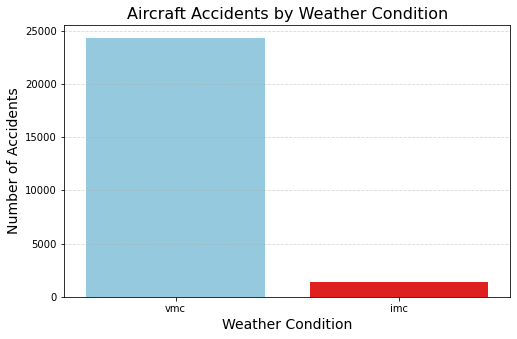

In [57]:
#clean to remove unkwon values
filtered_weather = mod_aviation_df[mod_aviation_df["Weather.Condition"] != "unk"]
weather_counts = filtered_weather["Weather.Condition"].value_counts()
plt.figure(figsize=(8, 5))

#plot
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette=["skyblue", "red"])
plt.xlabel("Weather Condition", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Aircraft Accidents by Weather Condition", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

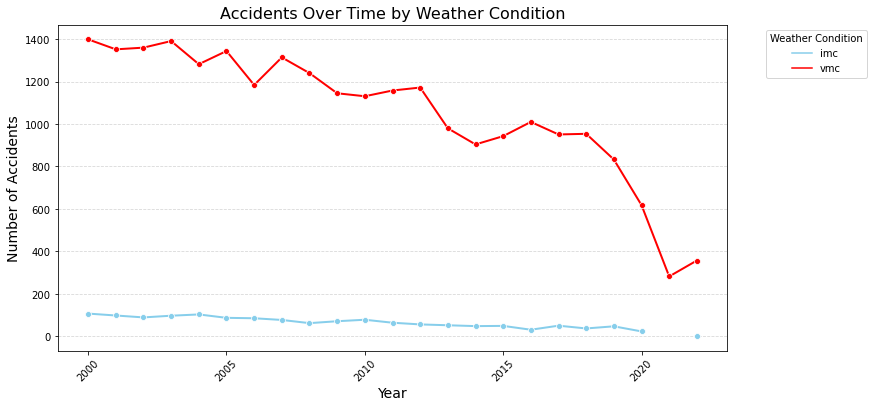

In [58]:
plt.figure(figsize=(12, 6))

#year
mod_aviation_df["Year"] = mod_aviation_df["Event.Date"].dt.year


#grouping - year and WC
weather_trends = filtered_weather.groupby(["Year", "Weather.Condition"]).size().unstack()

#line graph
sns.lineplot(data=weather_trends, marker="o", linewidth=2, dashes=False, palette=["skyblue", "red"])
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Accidents Over Time by Weather Condition", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Weather Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

<Figure size 1008x432 with 0 Axes>

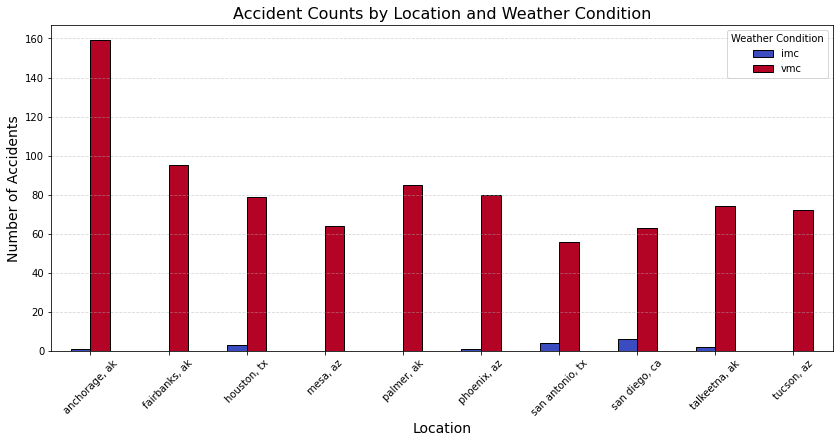

In [59]:
#locations with most acc - top 10
top_locations = mod_aviation_df["Location"].value_counts().head(10).index
filtered_data = mod_aviation_df[mod_aviation_df["Location"].isin(top_locations)]

#count accidents by location and weather condition
weather_location_counts = filtered_data.groupby(["Location", "Weather.Condition"]).size().unstack()

#bar chart
plt.figure(figsize=(14, 6))
weather_location_counts.plot(kind="bar", figsize=(14, 6), colormap="coolwarm", edgecolor="black")
plt.xlabel("Location", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.title("Accident Counts by Location and Weather Condition", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Weather Condition")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

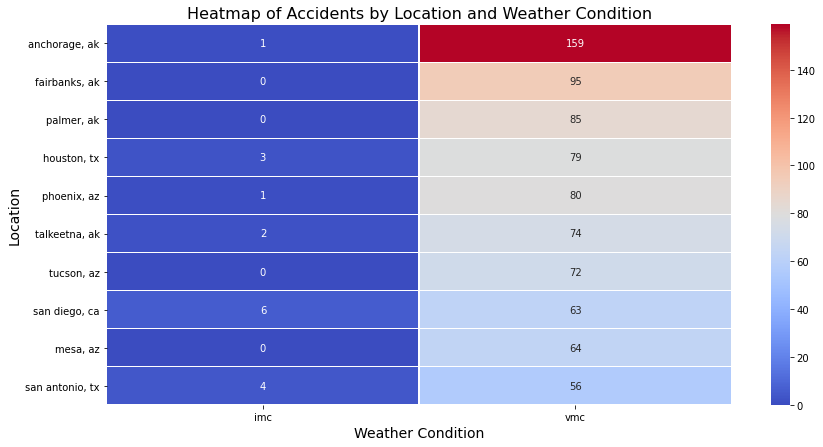

In [60]:
plt.figure(figsize=(14, 7))

#groupping by location and weather condition
heatmap_data = filtered_data.groupby(["Location", "Weather.Condition"]).size().unstack(fill_value=0)

# Show only top 10 accident-prone locations
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).nlargest(10).index]

#heatmap
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt="d")
plt.xlabel("Weather Condition", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.title("Heatmap of Accidents by Location and Weather Condition", fontsize=16)

plt.show()


### Answer:
Weather conditions in aviation are categorized into Visual Meteorological Conditions (VMC) and Instrument Meteorological Conditions (IMC):

- VMC (Visual Meteorological Conditions): Weather conditions allow pilots to operate the aircraft using visual references, meaning visibility and cloud clearances meet regulatory minimums.
- IMC (Instrument Meteorological Conditions): Weather conditions require pilots to rely on instruments due to poor visibility, such as fog, heavy rain, or low clouds.

The visuallizations show that:

1. Most accidents occur in VMC rather than IMC.  
   - This is counterintuitive but can be attributed to factors like human error, complacency, or high traffic volume during good weather.  
2. Location-based analysis indicates that areas like Anchorage, Fairbanks, and Palmer (all in Alaska) report high accident counts,  
   - These do not show a strong correlation with bad weather (IMC).  
   - This suggests that other factors, such as terrain challenges or operational risks, play a significant role in accidents at these locations.

#### Our business should prioritize investments in pilot training, risk prediction analytics, and better safety infrastructure at high-risk locations.
****

# Conclusions
As our company expands into the aviation industry, selecting the right aircraft is important for  safety and operational success. This project analyzed aviation accident data from 1962 to 2023, identifying key factors influencing aircraft safety and risk.

### Key Findings:
- **Aircraft safety varies with model and manufacturer** - Some manufacturers have consistently lower accident rates, making their aircraft safer choices.

- **Accident Trends Have Declined** - Advancement in technology and stricter regulations have reduced aviation accidents over time.

- **Key Risk Factors Identified** - Human error, mechanical failures, and adverse weather conditions are among the leading causes of accidents.

- **Data-Driven Aircraft Selection is Essential** - The safest aircraft are not necessarily the most popular ones, highlighting the need for informed decision-making.

### Business Recommendations:
1. Prioritize Aircraft with Low Accident Rates - Select models and manufacturers with strong safety records and low-risk profiles.

2. Invest in Modern Technology - Newer aircraft with automated safety systems reduce human error.

3. Invest in Maintenance & Training Programs - Regular inspections and good pilot education can minimize mechanical and operational failures.

4. Consider Operational Conditions - Flight routes and weather patterns should be factored into risk assessments.

### Limitations & Future Improvements:
- Data Gaps - Many accident records were incomplete, others missing relevant details.
- Advanced Predictive Models - Machine learning could enhance risk forecasting for better decision-making.